In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import methods
import pyarrow.feather as feather
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Feature importances

Описание данных:


ST_YEAR - год обучения

SEMESTER - семестр обучения

TYPE_NAME - тип контроля

DEBT - Академическая задолженность (1 есть долг, 0 нет долга)

MARK - результат контроля

СHOICE - выборность дисциплины

DISC_DEP - факультет-реализатор дисциплины

STUD_GENDER - пол студента

EXAM_TYPE - форма зачисления (ЕГЭ, олимпиада, ВИ - вступительные испытания)

EXAM_SUBJECT_1 - первый экзамен ЕГЭ

EXAM_SUBJECT_2 - второй экзамен ЕГЭ

EXAM_SUBJECT_3 - третий экзамен ЕГЭ

ADMITTED_EXAM_1 - баллы за 1 экзамен ЕГЭ

ADMITTED_EXAM_2 - баллы за 2 экзамен ЕГЭ

ADMITTED_EXAM_3 - баллы за 3 экзамен ЕГЭ

ADMITTED_SUBJECT_PRIZE_LEVEL - уровень олимпиады (если есть)

REGION_ID - номер региона

KURS - курс обучения, которому соответствует запись

Trainig_period - время обучения

In [ ]:
feature_importances = joblib.load(
    '/content/drive/MyDrive/Colab Notebooks/Pet_project/report/feature_importances.txt')

df = feather.read_feather(
    '/content/drive/MyDrive/Colab Notebooks/Pet_project/Processed data/df.feather')

In [ ]:
train = feather.read_feather(
    '/content/drive/MyDrive/Colab Notebooks/Pet_project/Processed data/train.feather')

In [ ]:
feature_importances

[array([ 646, 2320, 1268,  105, 5735,  176, 1272,  242,  355, 3924,   99,
        7297, 8296, 8560, 2438, 8249,  607,  658, 5514], dtype=int32),
 array([138, 227,  19,   6, 274,  40,  40,  15,  31, 121,   1, 179, 206,
        183,  76, 943,  87,  26, 388], dtype=int32),
 array([ 5.6134484 , 12.78288957,  3.01678581,  0.88815863,  6.66539197,
         2.77738563,  0.51526721,  1.35632414,  0.292726  ,  3.13505577,
         0.42250866,  8.71411075, 10.05450441,  9.65289533,  2.78989164,
         9.0696251 ,  4.86100491,  1.00777579, 16.38425028]),
 array([ 5.07315647, 16.87368827,  1.38744714,  0.09198946,  8.66585706,
         3.25692657,  0.34854733,  0.47784064,  0.11750798,  3.12878154,
         0.27398741,  4.71194659,  6.30415852,  5.20327701,  2.35195537,
         4.26232693,  9.87278891,  0.94083662, 26.6569802 ])]

In [ ]:
# приведем значения к одному диапазону
for i in range(2):
    feature_importances[i] = feature_importances[i] / 100

In [ ]:
# усредним значения признаков по моделям
feature_importance_final = np.mean(feature_importances, axis =0)

In [ ]:
# создадим датафрейм, добавим туда названия признаков, веса и посмотрим
importances = pd.DataFrame({
    'feature': df.drop('DEBT', axis=1).columns,
    'importance': feature_importance_final
}).sort_values(by='importance', ascending=False)

In [ ]:
importances

,feature,importance
15,REGION_ID,26.312988
13,ADMITTED_EXAM_3,25.571543
18,Training_period,25.515308
12,ADMITTED_EXAM_2,25.344666
11,ADMITTED_EXAM_1,22.046514
4,DISC_DEP,18.855312
1,SEMESTER,13.781644
9,EXAM_SUBJECT_2,11.678459
14,ADMITTED_SUBJECT_PRIZE_LEVEL,7.570462
16,KURS,5.418448


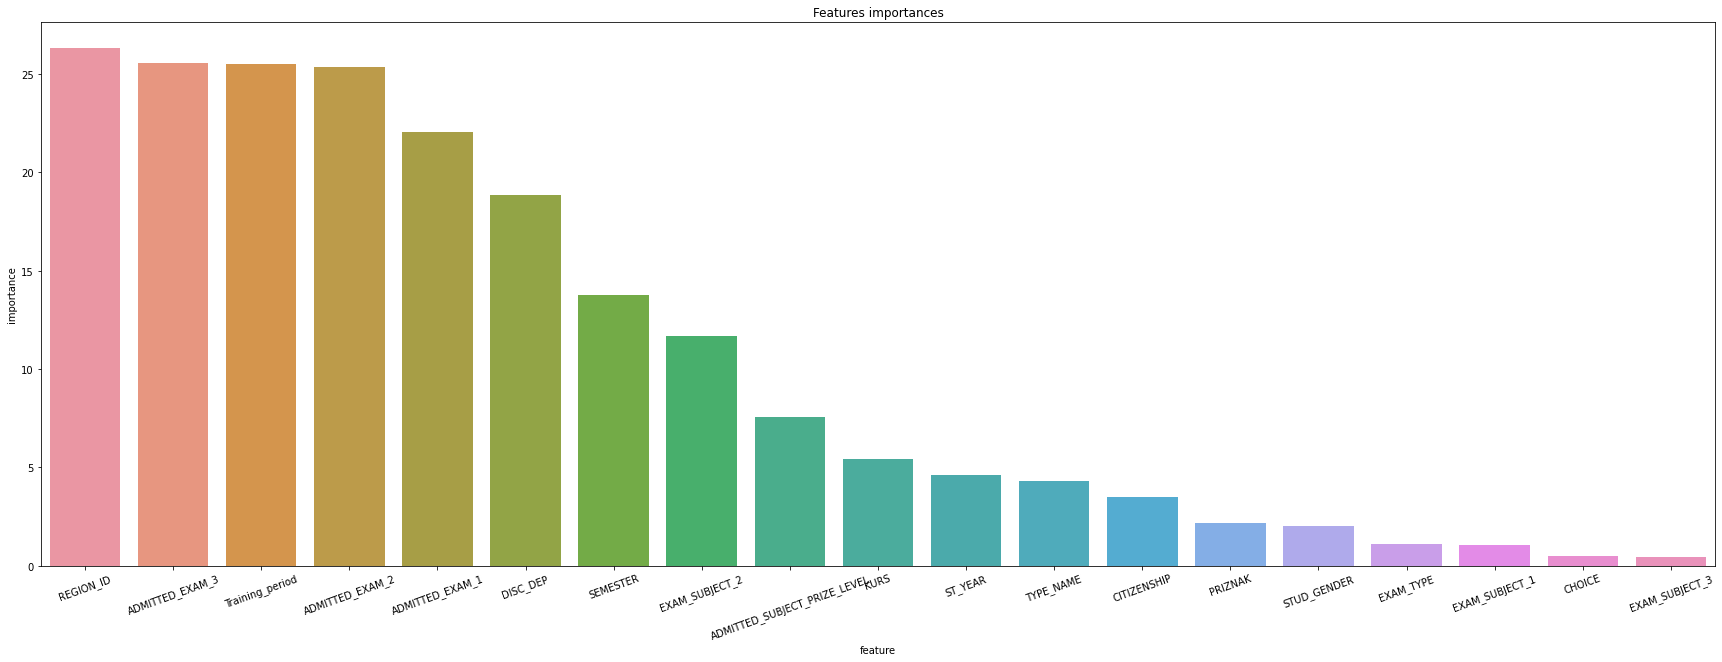

In [ ]:
# отобразим все на графике
plt.figure(figsize=(30,10))
sns.barplot(x='feature', y='importance', data=importances)
plt.xticks(rotation=20)
plt.title('Features importances');

# REGION_ID

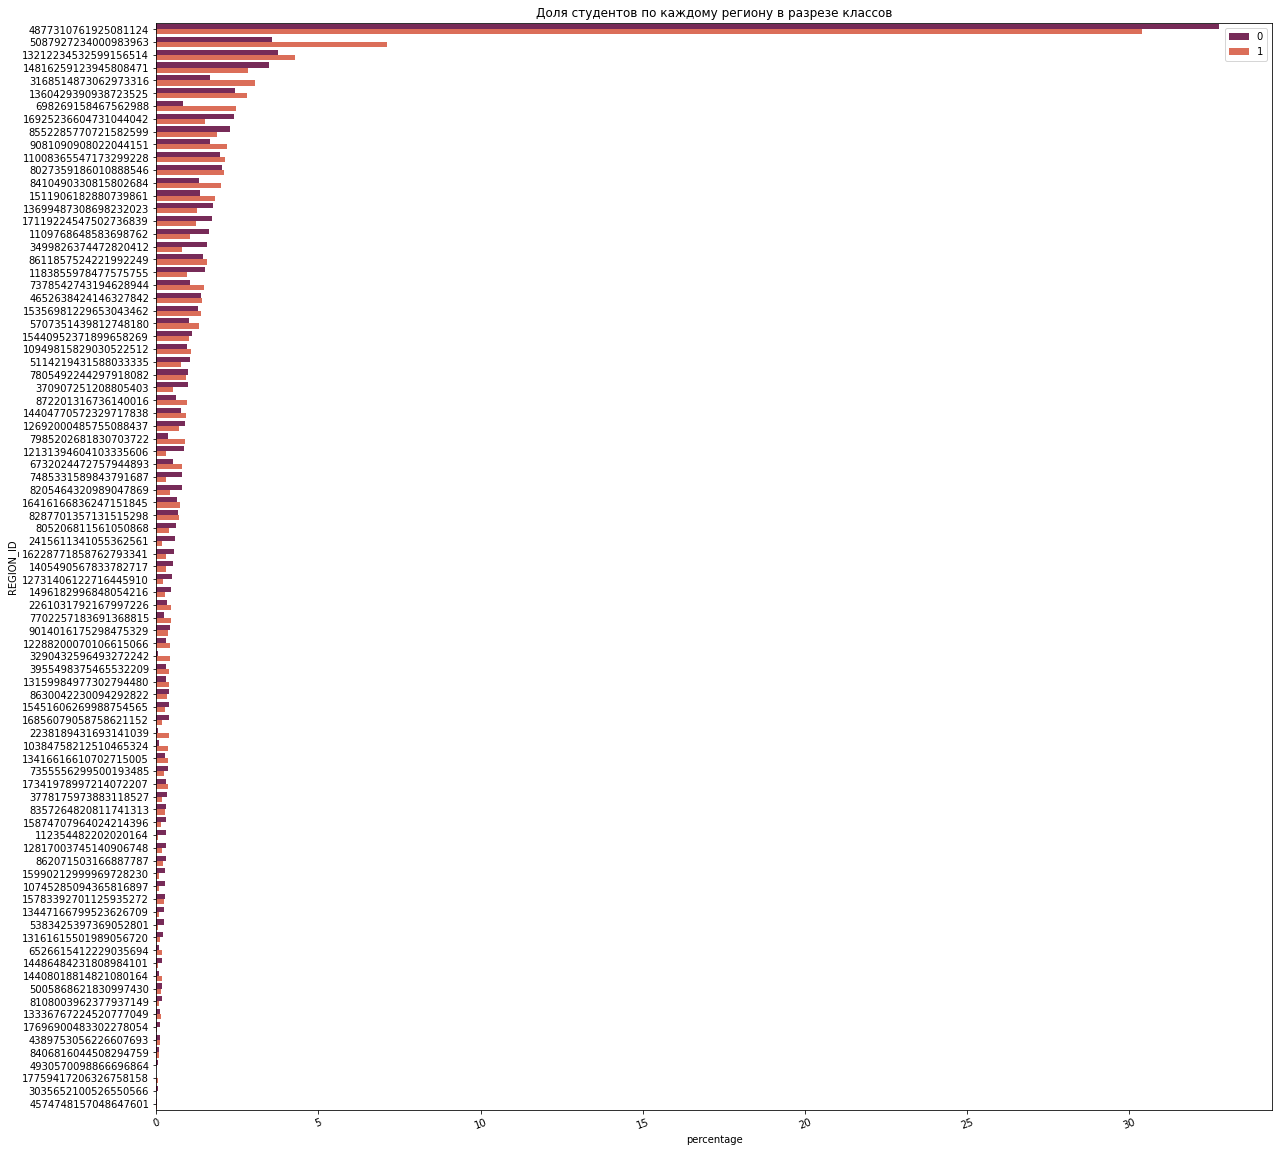

In [ ]:
# Посмотрим признаки по порядку. Начнем с REGION_ID
methods.bar_plot_group(df, 'REGION_ID', 'DEBT', 'h', (20,20), False)
plt.title('Доля студентов по каждому региону в разрезе классов');

**Видно, что есть регионы, студенты из которых имеют больше долгов. Выделим те регионы где студентов с долгами больше, чем без долгов**

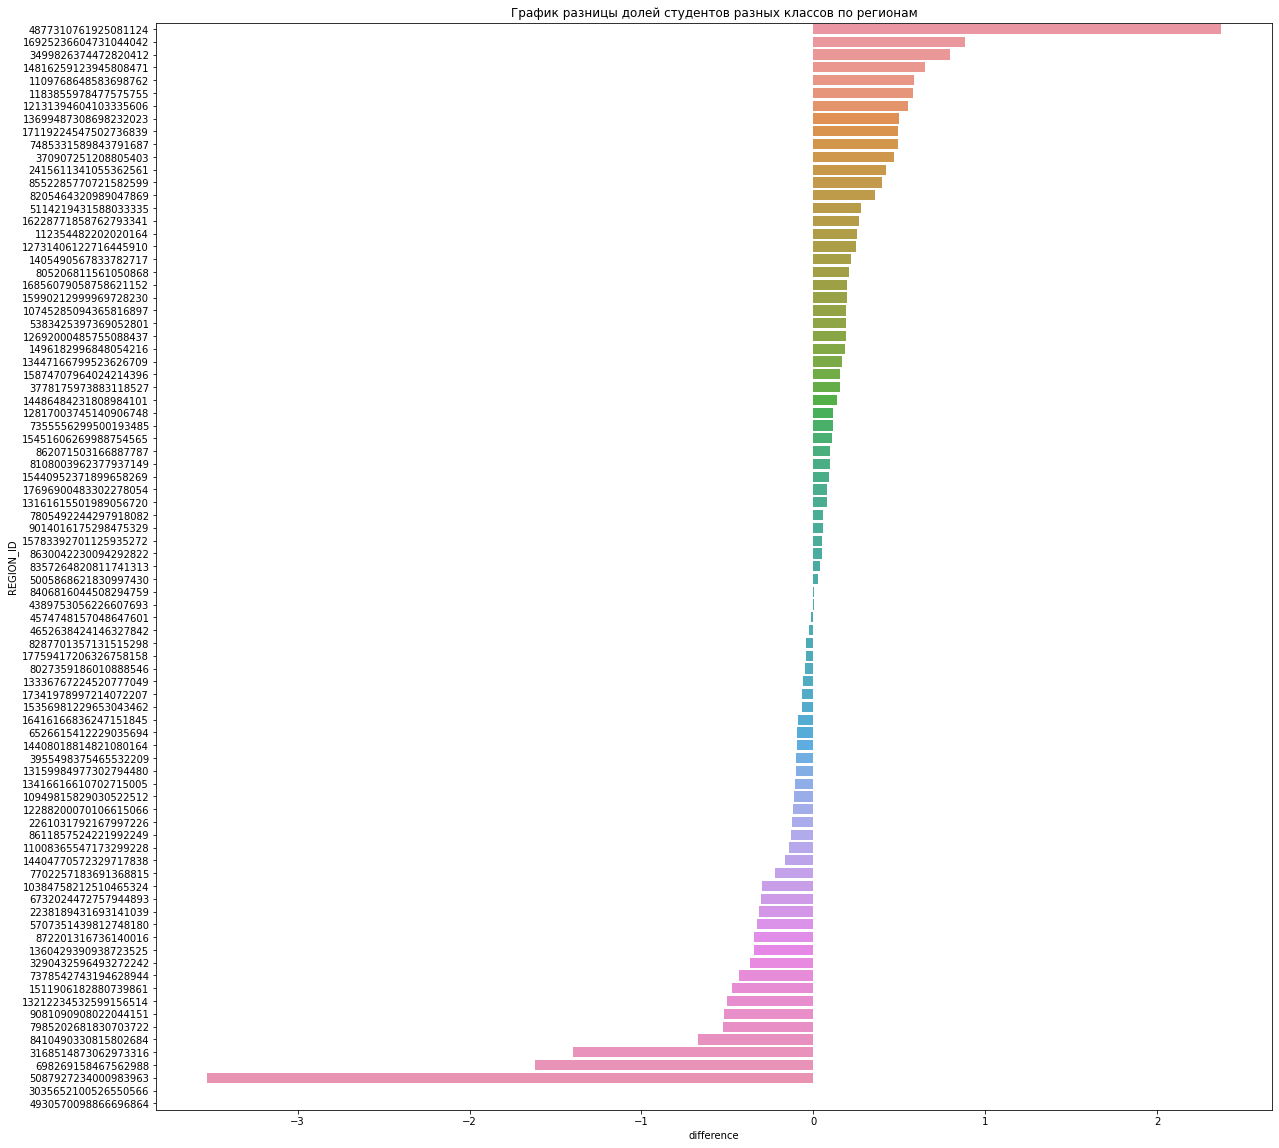

In [ ]:
# так как у нас доли по регионам сильно разные, посмотрим на разницу между классами по каждому региону
methods.plot_difference(df, 'REGION_ID', 'DEBT', (20,20))
plt.title('График разницы долей студентов разных классов по регионам');

В регионах где значения difference отрицательные, больше студентов с долгами чем без долгов.

# ADMITTED_EXAM_3

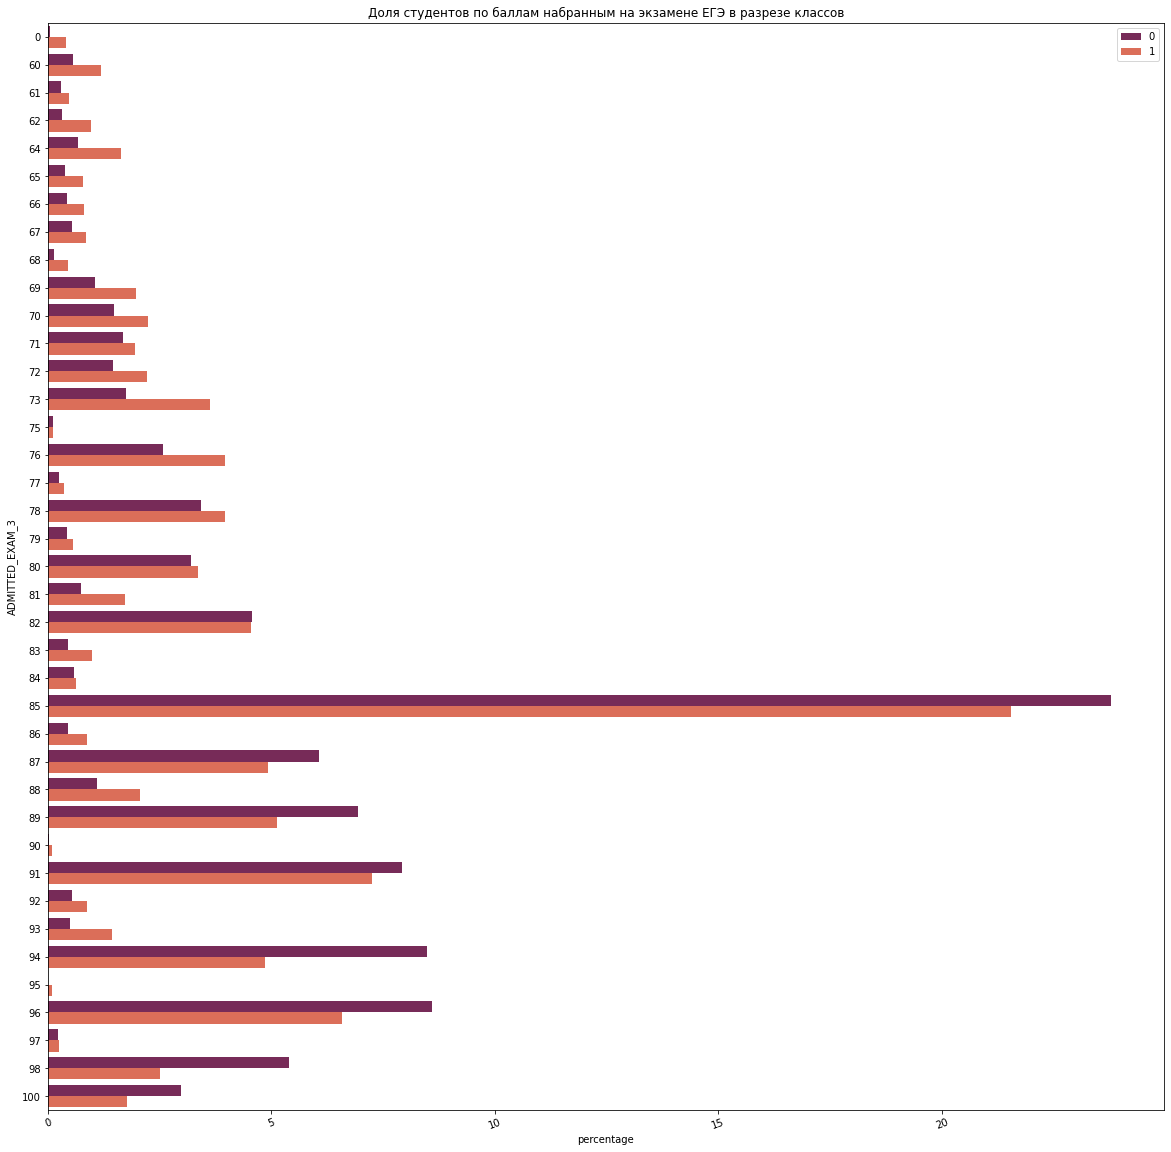

In [ ]:
methods.bar_plot_group(df, 'ADMITTED_EXAM_3', 'DEBT', 'h', (20,20), False)
plt.title('Доля студентов по баллам набранным на экзамене ЕГЭ в разрезе классов');

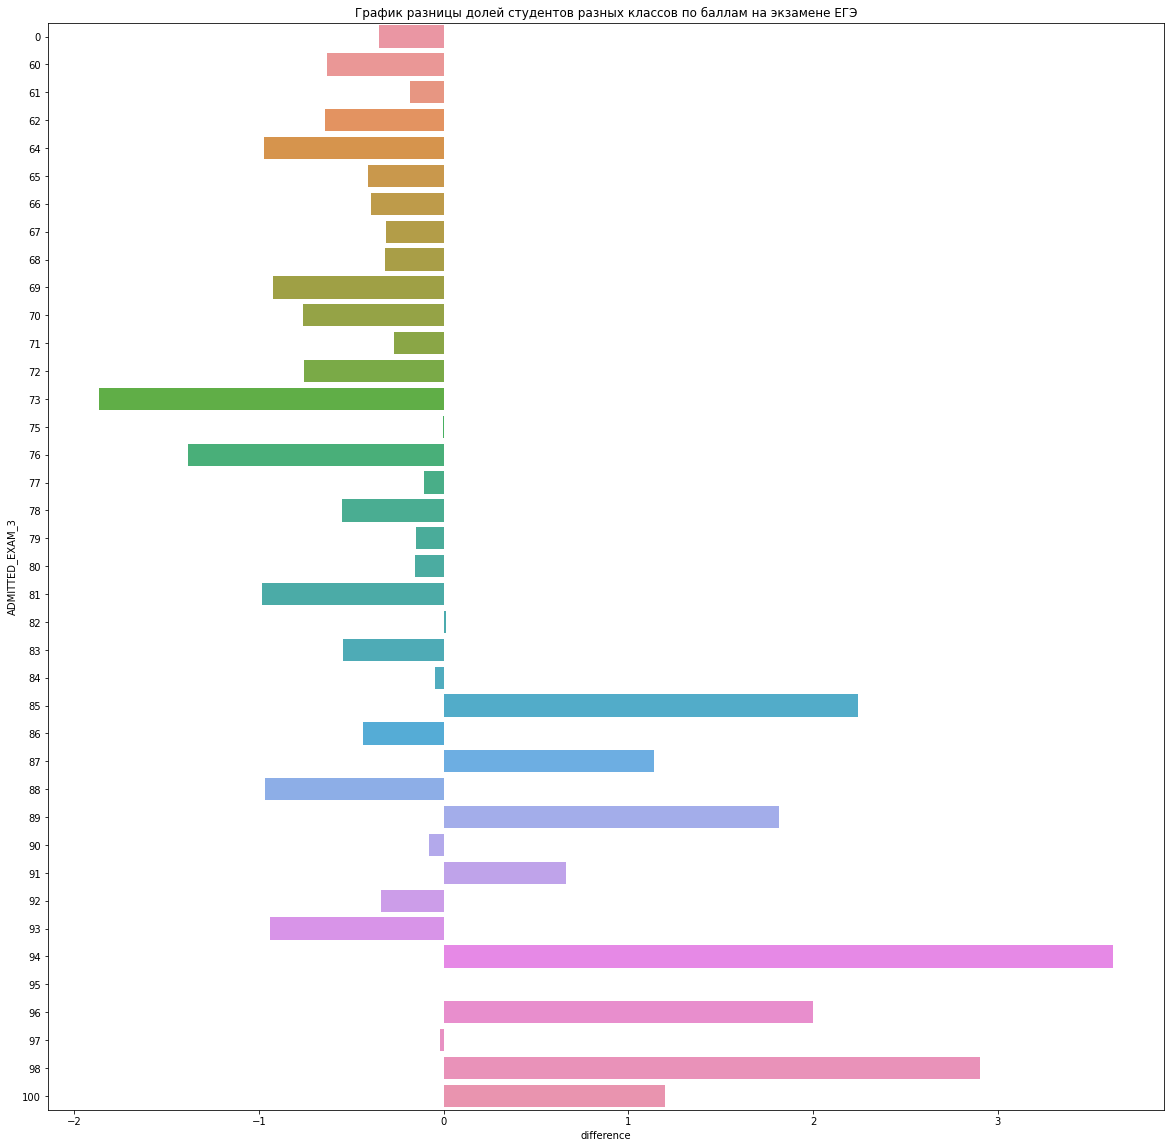

In [ ]:
methods.plot_difference(df, 'ADMITTED_EXAM_3', 'DEBT', (20,20))
plt.title('График разницы долей студентов разных классов по баллам на экзамене ЕГЭ');

В целом можно сказать, что  у студентов у которых ADMITTED_EXAM_3 был менее 84, доля тех кто имеет долги выше, чем тех кто не имеет

# Training period

In [ ]:
# Так как у нас большой разброс значений этого параметра, сделаем бины
df_cut = df.copy()
df_cut['Training_period'] = pd.cut(df_cut['Training_period'],
                                   bins=10).astype('str')

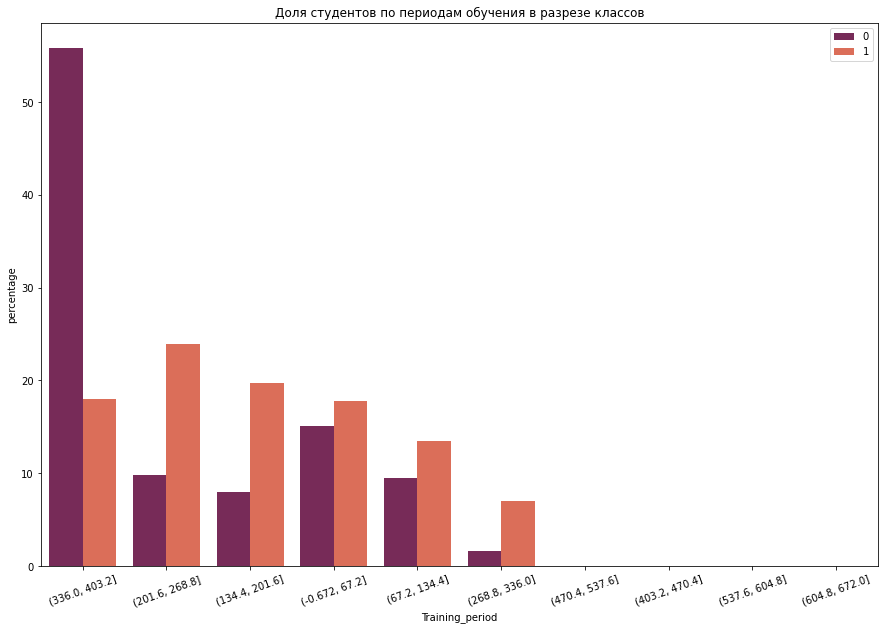

In [ ]:
methods.bar_plot_group(df_cut, 'Training_period', 'DEBT', 'v', (15, 10), False)
plt.title('Доля студентов по периодам обучения в разрезе классов')

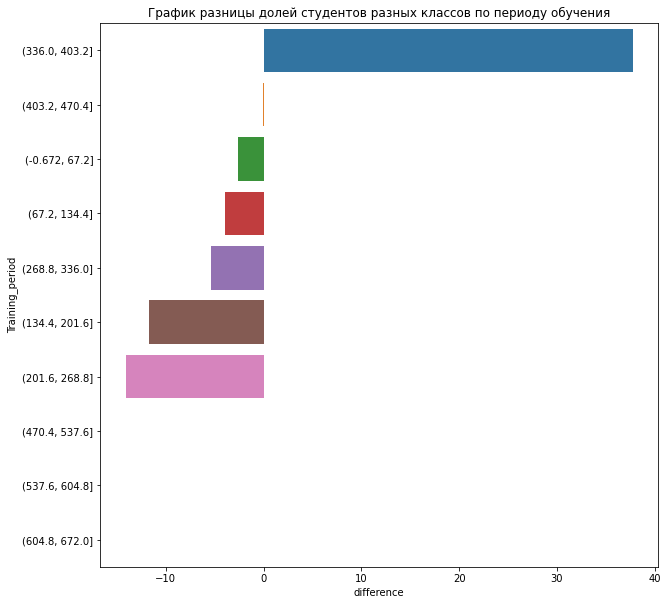

In [ ]:
methods.plot_difference(df_cut, 'Training_period', 'DEBT', (10,10))
plt.title('График разницы долей студентов разных классов по периоду обучения');

Самые сложные периоды обучения для студентов с 134 дня до 268. В это время число студентов с долгами выше чем без долгов.

# DISC DEP

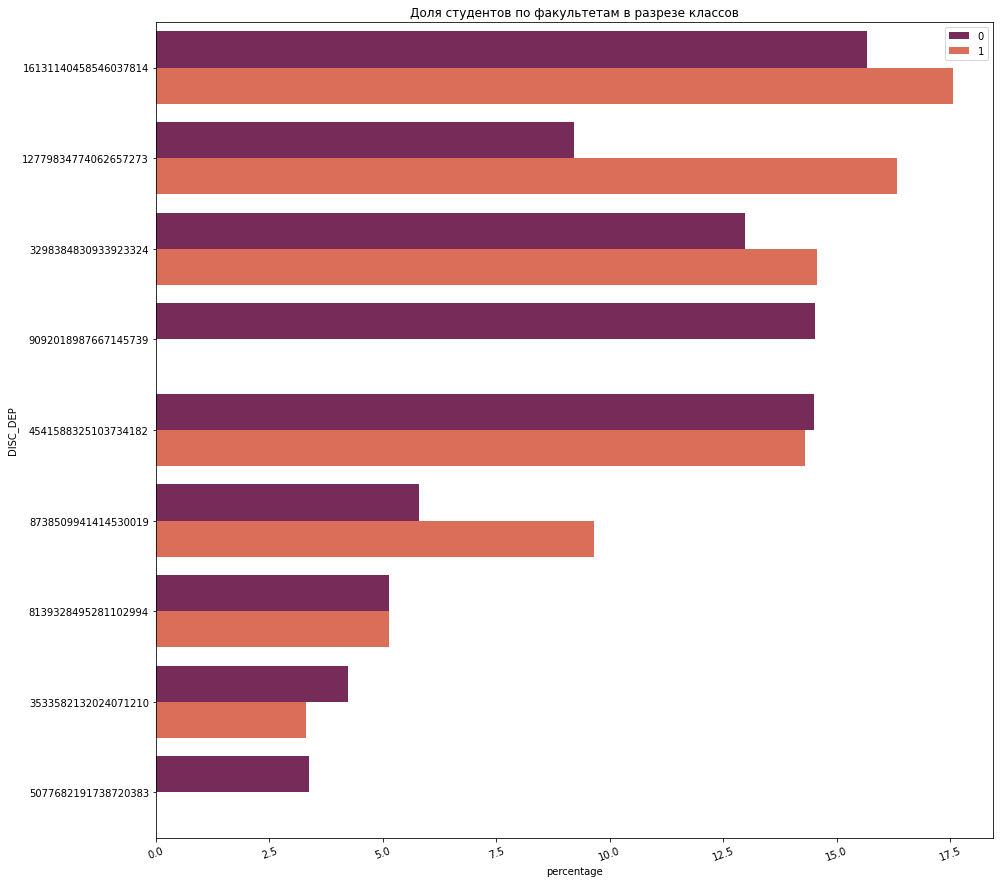

In [ ]:
methods.bar_plot_group(df, 'DISC_DEP', 'DEBT', 'h', (15, 15), False, 3.0)
plt.title('Доля студентов по факультетам в разрезе классов');

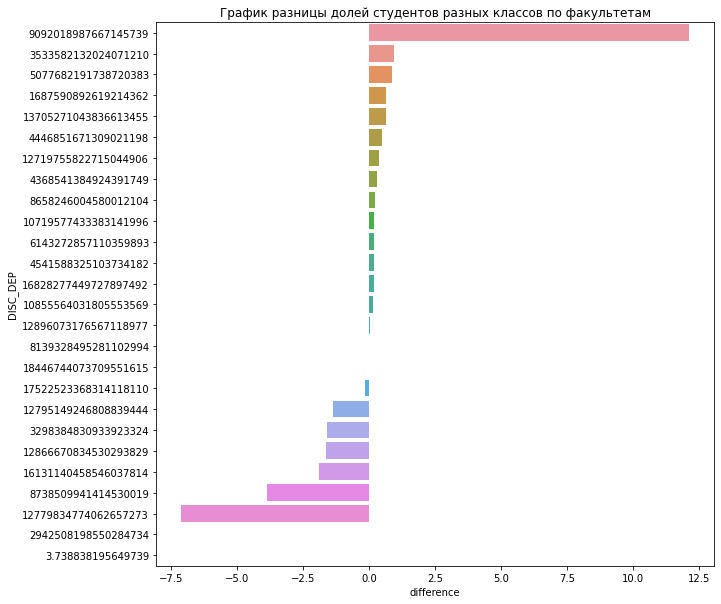

In [ ]:
methods.plot_difference(df, 'DISC_DEP', 'DEBT', (10,10))
plt.title('График разницы долей студентов разных классов по факультетам');

В программе обучения существует 7 факультетов в которых у студентов возникают особенные сложности (факультеты, у которых значения разницы классов отрицательные)


# SEMESTER

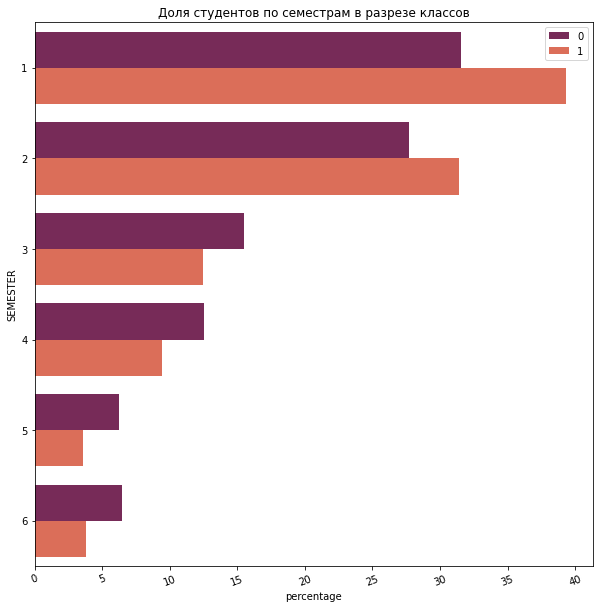

In [ ]:
methods.bar_plot_group(df, 'SEMESTER', 'DEBT', 'h', (10, 10), False)
plt.title('Доля студентов по семестрам в разрезе классов');

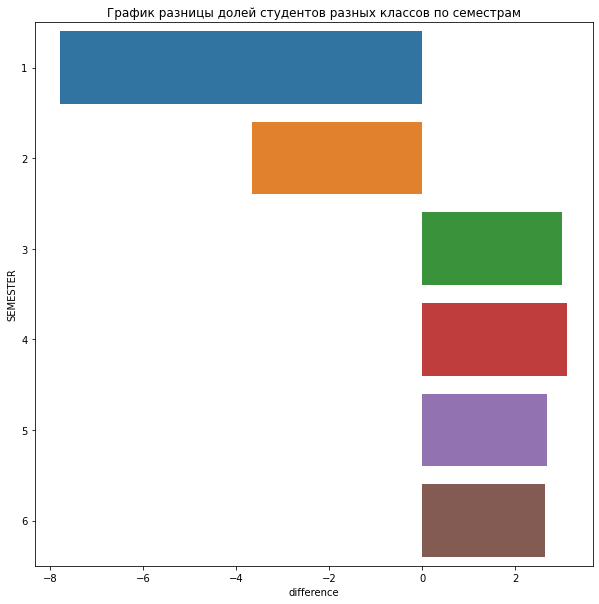

In [ ]:
methods.plot_difference(df, 'SEMESTER', 'DEBT', (10,10))
plt.title('График разницы долей студентов разных классов по семестрам');

Четко видно, что подавляющее большинство долгов возникает в первые 2 семестра обучения.

**Выводы и рекомендации:**

Мы выяснили, что основными факторами влияющими на задолженность студентов являются регион проживания, результаты вступительных экзаменов, особенности факультета, а так же то, на каком этапе происходит обучение. 

Вероятно на ранних этапах студентам сложно адаптироваться к новой среде, требованиям, информации, самостоятельности и др факторах. Следует более подробно изучить вопрос адаптации студентов и на основе этого разработать соответствующую программу. Похожая проблематика существует и при трудоустройстве новых сотрудников, где стоит особо внимательно подойти вопросу адаптации персонала. При разработке такой методики также  следует учесть региональные особенности образования, моделей поведения, индекса развития региона и тд.

Так же предлагается изучить особенности отдельных факультетов приведенных в анализе выше и, возможно, студентам с проходным баллом ниже определенного порога рекомендовать иные программы обучения, либо рекомендовать дополнительные материалы для более комфортного знакомства с дициплинами этих факультетов.




